Импорты

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

Создаёт пару мешгридов, где начало и конец определяются векторами x и y, а шаг равен h

In [21]:
def make_meshgrid(x, y, h=.02):
    d = 0.5
    x_min, x_max = x.min() - d, x.max() + d
    y_min, y_max = y.min() - d, y.max() + d
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

Раскрашивает график ax так, что координаты точки определяются векторами x и y, а значение (цвет) предугадывается обученной моделью clf

In [22]:
def plot_contours(ax, clf, x, y, **params):
    xx, yy = make_meshgrid(x,y)
    
    # ravel - раскрыть многомерный массив в одномерный, c_ - сделать zip двух одномерных массиов для получения всех возможных координат точек 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape) # Получаем массив из значений в каждой точке. Его нужно преобразовать в 2мерный => reshape
    out = ax.contourf(xx, yy, Z, **params)
    return out

Загрузить данные и выделить две переменные, на которых будем учить модели

In [37]:
iris = datasets.load_iris()
# sepal_lengths = iris['data'][:, 0]
# sepal_widths = iris['data'][:, 1]
# targets = iris['target']

sepal_lengths = iris['data'][iris.target!=0][:, 0]
sepal_widths = iris['data'][iris.target!=0][:, 1]
targets = iris['target'][iris.target!=0]

Создаём пустые модели, потом учим их (fit) на загруженных данных

In [38]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = [LogisticRegression(random_state=0),
          QuadraticDiscriminantAnalysis(),
          LinearDiscriminantAnalysis(solver="svd", store_covariance=True),
          svm.SVC(kernel='linear', C=C),
          svm.SVC(kernel='poly', degree=2, gamma='auto', C=C)]

models = [clf.fit(list(zip(sepal_lengths, sepal_widths)), targets) for clf in models]

1. Создаём графики и делаем отступы для названий
2. Пробегаемся по всем моделям, приписывая каждой из них свой подграфик - sub.flatten()
3. С помощью scatter расставляем точки на основе проверочных данных

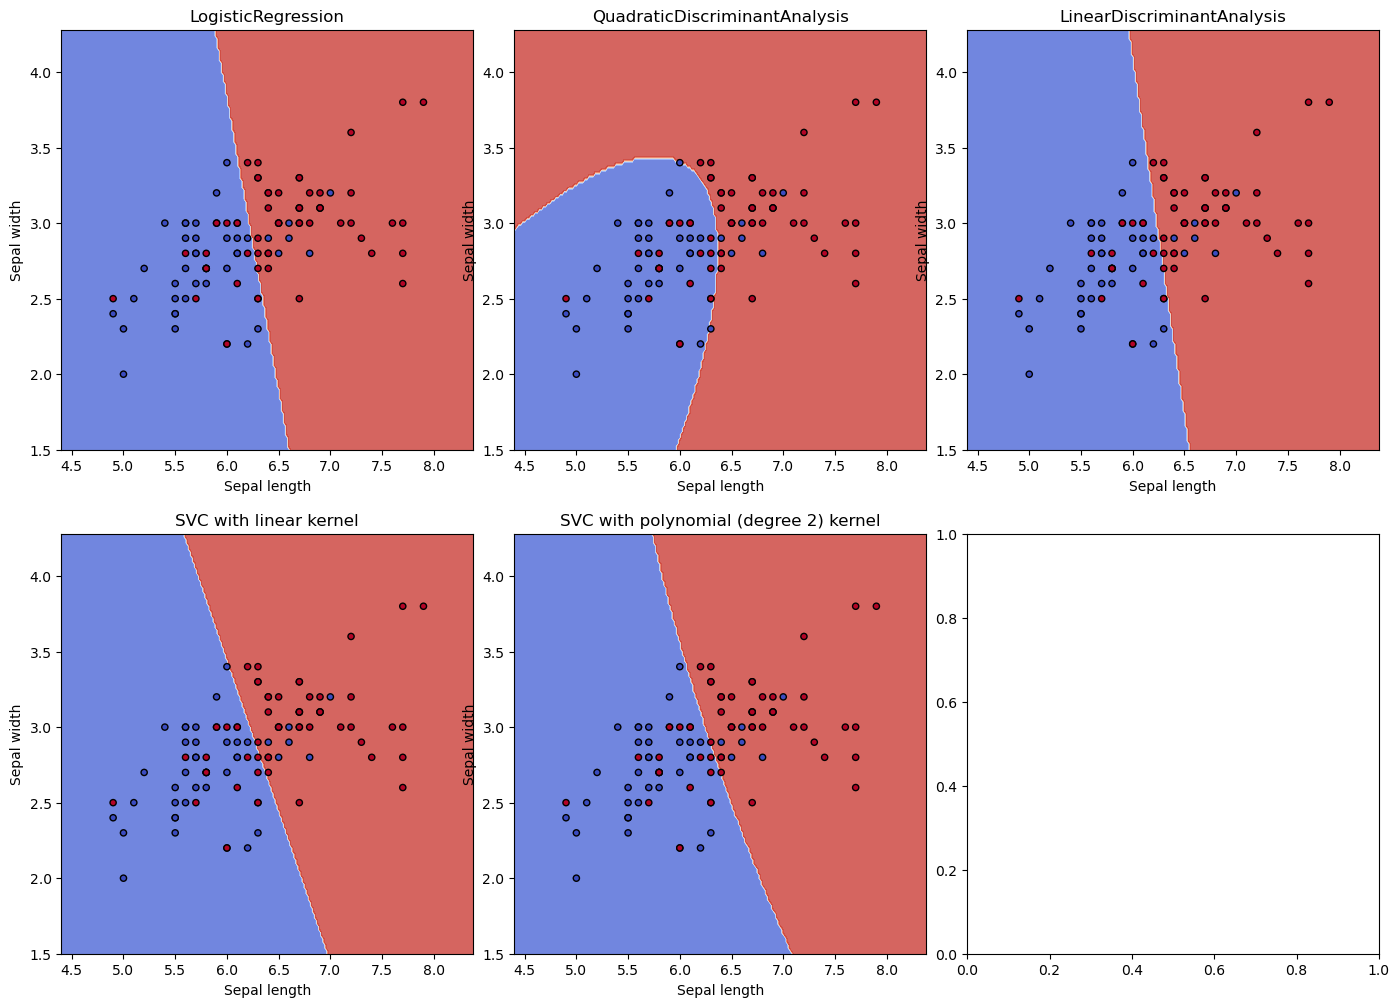

In [40]:
# title for the plots
titles = ['LogisticRegression',
          'QuadraticDiscriminantAnalysis',
          'LinearDiscriminantAnalysis',
          'SVC with linear kernel',
          'SVC with polynomial (degree 2) kernel']

# Set-up 2x3 grid for plotting.
fig, sub = plt.subplots(2, 3, figsize=(17,12))
plt.subplots_adjust(wspace=0.1, hspace=0.2)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, sepal_lengths, sepal_widths, cmap=plt.cm.coolwarm, alpha=0.8)
    
    ax.scatter(sepal_lengths, sepal_widths, c=targets, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
#     ax.set_xlim(xx.min(), xx.max())
#     ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    #ax.set_xticks(())
    #ax.set_yticks(())
    ax.set_title(title)

plt.show()